In [ ]:
# Make plots of input data
    # bar plot template in uni-file *

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Real data, template in dta_ldr

In [45]:
import coderdata as cd
cell_line = cd.DatasetLoader('cell_line', data_directory = '../data/cell_line/') # a
cptac = cd.DatasetLoader('cptac', data_directory = '../data/cptac/') # b
beataml = cd.DatasetLoader('beataml', data_directory = '../data/beataml/') # c
hcmi = cd.DatasetLoader('hcmi', data_directory = '../data/hcmi/') # d

print('DatasetLoaders in RAM')
systems = 'cell-line+CPTAC'

Processing Data...
Processing Data...
DatasetLoaders in RAM


In [ ]:
hcmi.samples.cancer_type.value_counts()

In [ ]:
-

In [ ]:
# sys_n_samp = beataml.samples
# cncr_n = 'ACUTE MYELOID LEUKAEMIA'

In [ ]:
--

#### beataml

In [2]:
beataml.samples.cancer_type.value_counts()

cancer_type
ACUTE MYELOID LEUKAEMIA    1189
Name: count, dtype: int64

In [ ]:
sys_n = beataml
cncr_n = 'ACUTE MYELOID LEUKAEMIA'

#### cptac

In [16]:
sys_n = cptac

In [15]:
cptac.samples.cancer_type.value_counts()

cancer_type
Pancreatic ductal adenocarcinoma         140
Breast carcinoma                         134
Head and Neck squamous cell carcinoma    112
Lung adenocarcinoma                      111
Lung squamous cell carcinoma             110
Ovarian carcinoma                        110
Clear cell renal cell carcinoma          110
Colon adenocarcinoma                     109
Uterine Corpus Endometrial Carcinoma     103
Glioblastoma multiforme                  100
Name: count, dtype: int64

In [ ]:
Cancer_type
pancreatic-adeno    195
lung-adeno          188
colon-adeno         165
glioblastoma        152
renal-clear-cell    127
Name: count, dtype: int64

In [17]:
cncrs_n = ['Pancreatic ductal adenocarcinoma',
           'Lung adenocarcinoma',
           'Colon adenocarcinoma',
           'Glioblastoma multiforme',
           'Clear cell renal cell carcinoma'
          ]

#### cell line

In [50]:
sys_n = cell_line

In [46]:
cell_line.samples.cancer_type.value_counts()

cancer_type
Lung Adenocarcinoma                    1886
Small Cell Lung Cancer                 1697
Pancreatic Adenocarcinoma              1657
Melanoma                               1643
Colon Adenocarcinoma                   1311
                                       ... 
Immortalized Lung Cells                   3
Immortalized Ovarian Cells                3
Uterine Clear Cell Carcinoma              3
Glassy Cell Carcinoma of the Cervix       3
Immortalized Epithelial Cells, CNS        3
Name: count, Length: 204, dtype: int64

In [58]:
cncrs_n = ['Acute Myeloid Leukemia',
           'Pancreatic Adenocarcinoma',
           'Lung Adenocarcinoma',
           'Colon Adenocarcinoma',
           'Glioblastoma',
           'Renal Clear Cell Carcinoma'
          ]

#### hcmi

In [84]:
sys_n = hcmi

In [86]:
sys_n_samp = sys_n.samples
sys_n_samp = sys_n_samp[sys_n_samp.model_type == '3D Organoid']

In [88]:
hcmi.samples.cancer_type.value_counts()

cancer_type
Adenocarcinoma, NOS                                     380
Glioblastoma                                            145
Infiltrating duct carcinoma, NOS                        105
Malignant melanoma, NOS                                  82
Adenocarcinoma, metastatic, NOS                          37
Mucinous adenocarcinoma                                  22
Tubulovillous adenoma, NOS                               22
Carcinoma, NOS                                           19
Intraductal papillary-mucinous carcinoma, invasive        9
Tubular adenoma, NOS                                      8
Spindle cell sarcoma                                      7
Adenocarcinoma, intestinal type                           6
Nephroblastoma, NOS                                       6
Gliosarcoma                                               6
Alveolar rhabdomyosarcoma                                 5
Epithelioid sarcoma                                       5
Not Reported                

In [89]:
hcmi.samples.common_name.value_counts()

common_name
Colon, NOS                                              188
Brain, NOS                                              151
Pancreas, NOS                                           134
Esophagus, NOS                                          119
Skin, NOS                                                90
Rectum, NOS                                              66
Stomach, NOS                                             33
Ampulla of Vater                                         19
Bone, NOS                                                14
Extrahepatic bile duct                                   13
Lung, NOS                                                13
Connective, subcutaneous and other soft tissues, NOS     13
Small intestine, NOS                                     12
Not Reported                                             11
Breast, NOS                                               9
Ovary                                                     9
Kidney, NOS                 

In [90]:
cncrs_n = ['---',
           'Pancreas, NOS',
           '---',
           'Colon, NOS',
           'Brain, NOS',
           '---'
          ]

#### main

In [79]:
ci = 5
print(cncrs_n[ci])
# sys_n_samp = sys_n.samples # Extra sub-set step for HCMI
sys_n_samp_canc_n = sys_n_samp[sys_n_samp.cancer_type == cncrs_n[ci]]
ids_sys_n = sys_n_samp_canc_n.improve_sample_id

Renal Clear Cell Carcinoma


In [101]:
# Main, HCMI
ci = 4
print(cncrs_n[ci])
sys_n_samp_canc_n = sys_n_samp[sys_n_samp.common_name == cncrs_n[ci]]
ids_sys_n = sys_n_samp_canc_n.improve_sample_id

Brain, NOS


In [ ]:
C-typ position key: ['AML',
                     'Pancreatic-adeno',
                     'Lung-adeno',
                     'Colon-adeno',
                     'Gliblastoma',
                     'Renal-clear-cell'
]

##### Transcriptomics

In [102]:
len(sys_n.transcriptomics[
    sys_n.transcriptomics.improve_sample_id.isin(
        ids_sys_n)].improve_sample_id.unique())

78

In [ ]:
BeatAML = [707, 0, 0, 0, 0, 0]
CPTAC = [0, 140, 111, 105, 100, 110]
Cell_line = [31, 55, 77, 60, 52, 17]
HCMI = [0, 69, 0, 87, 78, 0]

##### Proteomics

In [103]:
len(sys_n.proteomics[
    sys_n.proteomics.improve_sample_id.isin(
        ids_sys_n)].improve_sample_id.unique())

AttributeError: 'DataFrame' object has no attribute 'improve_sample_id'

In [ ]:
BeatAML = [210, 0, 0, 0, 0, 0]
CPTAC = [0, 105, 106, 97, 99, 103]
Cell_line = [10, 18, 37, 28, 10, 6]
HCMI = [0, 0, 0, 0, 0, 0]

##### Mutations

In [ ]:
sys_n.mutations

In [104]:
len(sys_n.mutations[
    sys_n.mutations.improve_sample_id.isin(
        ids_sys_n)].improve_sample_id.unique())

68

In [55]:
BeatAML = [871, 0, 0, 0, 0, 0]
CPTAC = [0, 58, 108, 0, 99, 110]
Cell_line = [34, 59, 79, 61, 64, 22]
HCMI = [0, 55, 0, 62, 68, 0]

##### Copy number

In [11]:
sys_n.copy_number

""


In [105]:
len(sys_n.copy_number[
    sys_n.copy_number.improve_sample_id.isin(
        ids_sys_n)].improve_sample_id.unique())

65

In [ ]:
BeatAML = [0, 0, 0, 0, 0, 0]
CPTAC = [0, 105, 109, 104, 99, 103]
Cell_line = [36, 62, 83, 64, 65, 27]
HCMI = [0, 53, 0, 89, 65, 0]

### Raw 3D temlate

In [12]:
# Dimensions
categories = ['A1', 'B', 'C']
levels = ['Level 1', 'Level 2', 'Level 3']
values = np.array([
    [5, 3, 1],
    [6, 2, 4],
    [3, 5, 2]
])

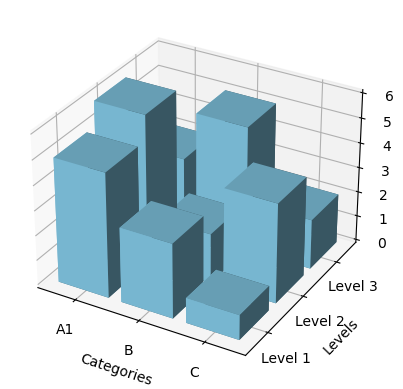

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(np.arange(values.shape[1]), np.arange(values.shape[0]))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(values.shape).flatten()

dx = 0.8 * np.ones_like(zpos)
dy = dx.copy()
dz = values.flatten()

# Initial bottom values for stacking
bottom = np.zeros_like(dz)

for i in range(len(dz)):
    ax.bar3d(xpos[i], ypos[i], bottom[i], dx[i], dy[i], dz[i], color='skyblue', zsort='average')
    bottom[i] += dz[i]  # Update bottom for the next layer

ax.set_xlabel('Categories')
ax.set_ylabel('Levels')
ax.set_zlabel('Values')
ax.set_xticks(np.arange(len(categories)) + 0.4)  # Center the bars
ax.set_yticks(np.arange(len(levels)) + 0.4)
ax.set_xticklabels(categories)
ax.set_yticklabels(levels)
# plt.tight_layout()
plt.savefig('plots/3d_test_3.png')
plt.show()

### Production

In [7]:
# Dimensions
systems = ['Cell line', 'CPTAC', 'HCMI']
cancers = ['Lung', 'Brain', 'Breast', 'Pancreas']
sample_counts = np.array([
    [5, 3, 1],
    [20, 15, 10],
    [50, 40, 30],
    [100, 80, 60]
])
version = '5'

In [ ]:
'skyblue', 'lightyellow', 'lightgreen', 'mistyrose'

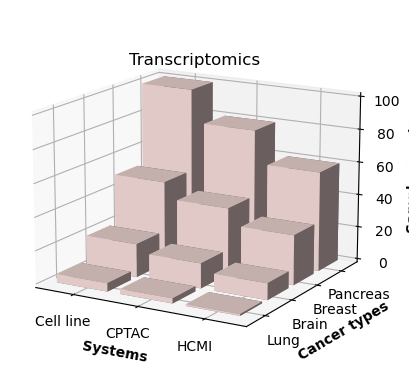

In [16]:
three_d(systems, cancers, sample_counts,
        'Transcriptomics', '7', 'mistyrose')

In [13]:
def three_d(categories, levels, values,
            title, vrsn, clr):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xpos, ypos = np.meshgrid(np.arange(values.shape[1]), np.arange(values.shape[0]))
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(values.shape).flatten()
    
    dx = 0.8 * np.ones_like(zpos)
    dy = dx.copy()
    dz = values.flatten()

    # dx = 0.6 * np.ones_like(zpos)  # Adjust the value to control the width
    # dy = dx.copy()
    
    # Initial bottom values for stacking
    bottom = np.zeros_like(dz)
    
    for i in range(len(dz)):
        ax.bar3d(xpos[i], ypos[i], bottom[i], dx[i], dy[i], dz[i],
                 color=clr, zsort='average')
        bottom[i] += dz[i]  # Update bottom for the next layer
    
    ax.set_xlabel('Systems', fontweight='bold')
    ax.set_ylabel('Cancer types', fontweight='bold')
    ax.set_zlabel('Sample counts', fontweight='bold')
    ax.set_xticks(np.arange(len(categories)) + 0.4)  # Center the bars
    ax.set_yticks(np.arange(len(levels)) + 0.4)
    ax.set_xticklabels(categories)
    ax.set_yticklabels(levels)
    ax.view_init(elev=15, azim=-60) # Adjust to remove overlab
    plt.title(title, y = .9)
    plt.savefig('plots/3d_test_'+vrsn+'.png')
    plt.show()

#### Devel, figure function

In [3]:
color='skyblue'

In [8]:
def three_d(systems, cancers,
            sample_counts, title, color):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xpos, ypos = np.meshgrid(np.arange(sample_counts.shape[1]), np.arange(sample_counts.shape[0]))
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(sample_counts.shape).flatten()
    
    dx = 0.8 * np.ones_like(zpos)
    dy = dx.copy()
    dz = sample_counts.flatten()

    # dx = 0.6 * np.ones_like(zpos)  # Adjust the value to control the width
    # dy = dx.copy()
    
    # Initial bottom values for stacking
    bottom = np.zeros_like(dz)
    
    for i in range(len(dz)):
        ax.bar3d(xpos[i], ypos[i], bottom[i], dx[i], dy[i], dz[i],
                 color=color, zsort='average')
        bottom[i] += dz[i]  # Update bottom for the next layer
    
    ax.set_xlabel('Systems', fontweight='bold')
    ax.set_ylabel('Cancer types', fontweight='bold')
    ax.set_zlabel('Sample counts', fontweight='bold')
    ax.set_xticks(np.arange(len(systems)) + 0.4)  # Center the bars
    ax.set_yticks(np.arange(len(sample_counts)) + 0.4)
    ax.set_xticklabels(systems)
    ax.set_yticklabels(sample_counts)
    ax.view_init(elev=15, azim=-60) # Adjust to remove overlab
    plt.title(title, y = .9)
    plt.savefig('plots/3d_test_2.png')
    plt.show()

#### Continue

In [9]:
three_d(systems, cancers,
        sample_counts, title = 'Transcriptomics',
        color='skyblue')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function _draw_all_if_interactive at 0x11a9311b0> (for post_execute), with arguments args (),kwargs {}:


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 640x480 with 1 Axes>